In [1]:
!pip install yfinance
!pip install pandas==1
!pip install requests
!pip install bs4
!pip install plotly

  Using cached pandas-1.3.5.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.3.5-cp312-cp312-macosx_10_9_x86_64.whl size=10120888 sha256=20195ea26e13b1725bfa9bfd7ce1cc90015b5dd6d38e792122c928e905cbaa07
  Stored in directory: /Users/thando/Library/Caches/pip/wheels/e3/15/7f/43571d4c48966d63f4f7a640e9345b57e23f1656d4d5b81b16
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.0 requires pandas>=2, but you have pandas 1.3.5 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.5 which is incom

In [12]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


print("Yahoo Fianance lib : ", yf.__version__)
print("Pandas : ", pd.__version__)

Yahoo Fianance lib :  0.1.67
Pandas :  1.3.5


In [56]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Question 1 - Extracting Tesla Stock Data Using yfinance

In [60]:
tesla = yf.Ticker("TSLA")

In [62]:
tesla_data = tesla.history(period="max")

In [63]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [64]:
soup = BeautifulSoup(html_data,"html5lib")

In [65]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [67]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [82]:
soup = BeautifulSoup(html_data, "html5lib")

In [84]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [86]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$',"")

/var/folders/bw/zk_mjw4j7wj3_t08__wfjnl00000gn/T/ipykernel_2443/3771847254.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$',"")


In [88]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [92]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### Question 3 - Extracting GameStop Stock Data Using yfinance

In [100]:
gme = yf.Ticker('GME')

In [102]:
gme_data = gme.history(period = "max")

In [104]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [106]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [108]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

In [110]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [112]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Question 5 - Tesla Stock and Revenue Dashboard

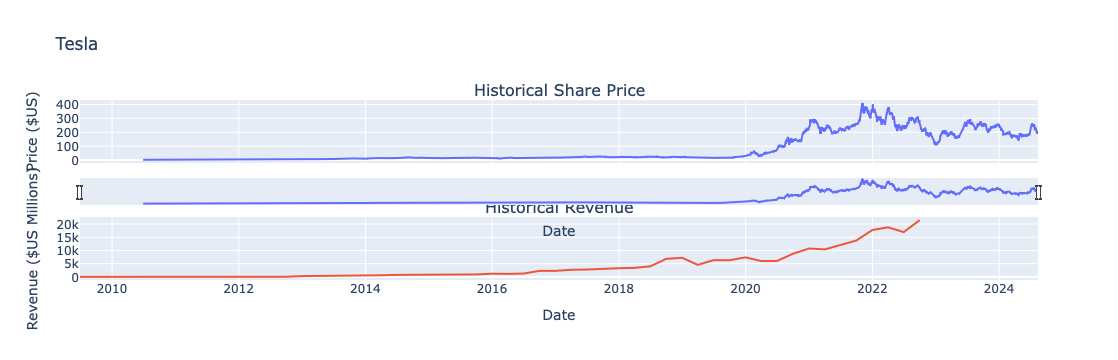

In [128]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Question 6 - GameStop Stock and Revenue Dashboard

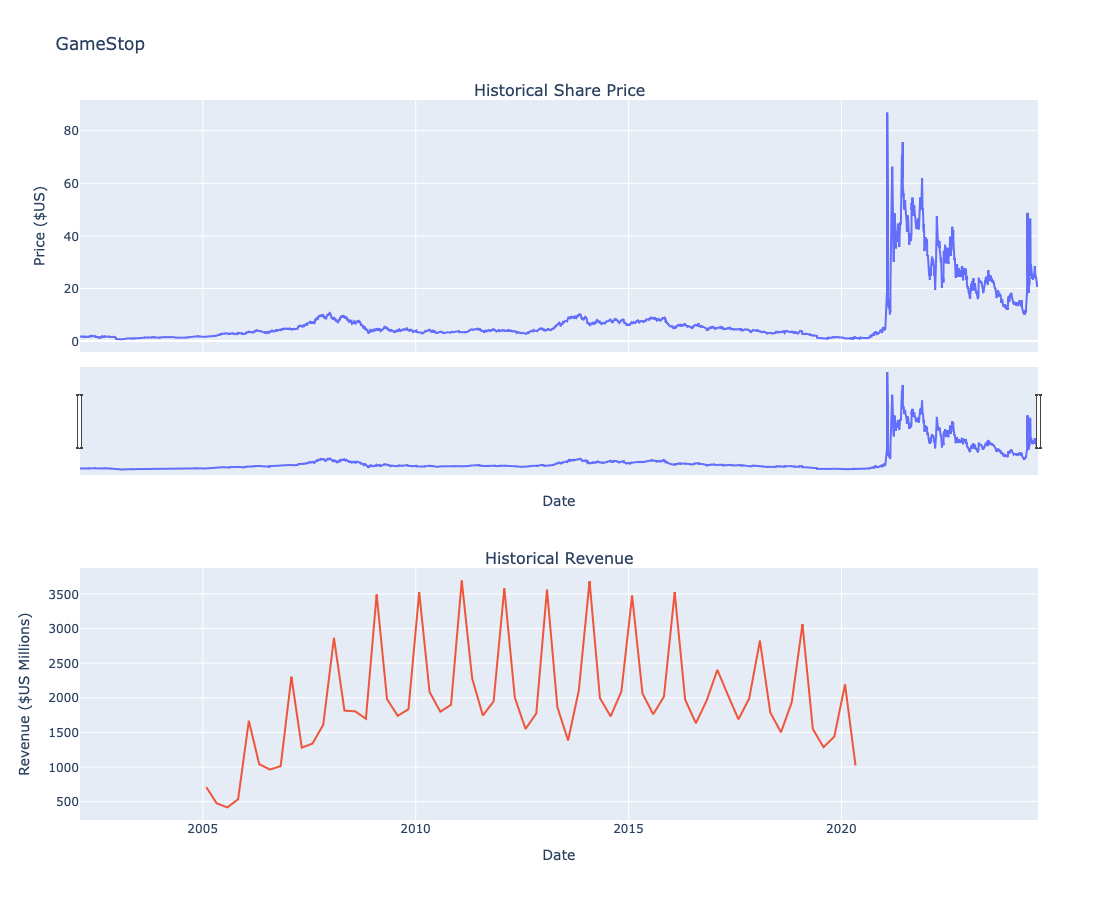

In [130]:
make_graph(gme_data, gme_revenue, 'GameStop')